In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

In [2]:
artists = pd.read_csv("artists.csv")
tracks = pd.read_csv("tracks.csv")
artists.dropna(how='any')
tracks.dropna(how='any')
tracks['release_date'] = pd.to_datetime(tracks['release_date'], format="%Y-%m-%d").dt.year
tracks.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [3]:
popularity_years = tracks[['release_date','popularity']]
popularity_years = popularity_years.groupby(['release_date'], as_index=True).mean().iloc[1:-1]
max_popularity_years = tracks[['release_date','popularity','name','artists', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence']]
max_popularity_years = max_popularity_years.groupby(['release_date'], as_index=True).apply(lambda group: group.loc[group['popularity'] == group['popularity'].max()]).reset_index(level=-1, drop=True).iloc[2:]
max_popularity_years = max_popularity_years.drop_duplicates(subset=['release_date', 'popularity'], keep='last')
def str_to_list(x):
    if type(x) == str:
        tmp = ast.literal_eval(x)
        return ", ".join(map(str, tmp))
    return x
max_popularity_years['artists'] = max_popularity_years['artists'].apply(str_to_list)
max_popularity_years['danceability'] = max_popularity_years['danceability'] * 100
max_popularity_years['energy'] = max_popularity_years['energy'] * 100
max_popularity_years['speechiness'] = max_popularity_years['speechiness'] * 100
max_popularity_years['instrumentalness'] = max_popularity_years['instrumentalness'] * 100
max_popularity_years['liveness'] = max_popularity_years['liveness'] * 100
max_popularity_years['valence'] = max_popularity_years['valence'] * 100
max_popularity_years.tail(20)


,release_date,popularity,name,artists,danceability,energy,speechiness,instrumentalness,liveness,valence
release_date,,,,,,,,,,
2002,2002,85,Without Me,Eminem,90.8,66.9,7.38,0.00000,23.70,66.2
2003,2003,84,Seven Nation Army,The White Stripes,72.6,46.3,7.99,44.70000,25.50,32.1
2004,2004,83,Yeah! (feat. Lil Jon & Ludacris),"Usher, Lil Jon, Ludacris",89.4,79.1,11.20,0.00000,3.88,58.3
2005,2005,87,Cupid's Chokehold / Breakfast in America,Gym Class Heroes,72.0,74.4,12.00,0.00000,25.50,61.9
2006,2006,82,Promiscuous,"Nelly Furtado, Timbaland",80.8,97.0,5.06,0.00613,15.40,86.8
2007,2007,83,X Gon' Give It To Ya,DMX,76.1,89.9,18.30,0.00000,7.19,67.3
2008,2008,86,Hayloft,Mother Mother,52.7,92.2,7.28,0.01620,42.20,49.0
2009,2009,83,Bad Romance,Lady Gaga,69.6,92.1,3.63,0.00524,8.42,71.4
2010,2010,84,"Hey, Soul Sister",Train,67.3,88.6,4.31,0.00000,8.26,79.5


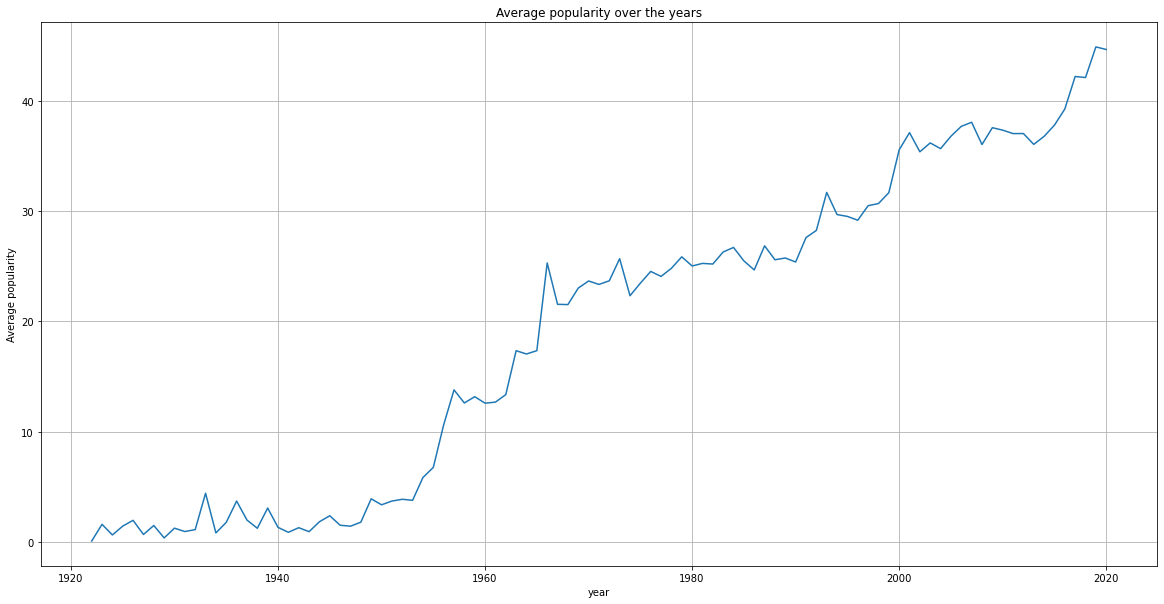

In [4]:
plt.figure(figsize=(20,10))
plt.plot(popularity_years)

plt.title("Average popularity over the years")
plt.xlabel("year")
plt.ylabel("Average popularity")
plt.grid()

In [5]:
max_popularity_years.to_json('most_popular_songs_by_year.json', orient='records')

In [6]:
genres_tracks = tracks[['release_date','popularity','name','artists', 'id_artists', 'danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
genres_tracks = genres_tracks.groupby(['release_date'], as_index=False).apply(lambda group: group.loc[group['popularity'] == group['popularity'].max()]).reset_index(level=-1, drop=True).iloc[2:]
genres_tracks = genres_tracks.drop_duplicates(subset=['release_date', 'popularity'], keep='last')

genres_tracks['id_artists'] = genres_tracks['id_artists'].apply(lambda x: ast.literal_eval(x))
genres_tracks = genres_tracks.explode('id_artists', ignore_index=True)
artists_genres = artists[['id', 'genres']]
genres_tracks = pd.merge(genres_tracks.set_index('id_artists', drop=True),artists_genres.set_index('id', drop=True), how='left',left_on=['id_artists'],right_on=['id'], left_index=True, right_index=True).dropna().reset_index()
genres_tracks = genres_tracks.sort_values(by='release_date')
genres_tracks = genres_tracks[['release_date','popularity','name','artists', 'danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'genres']].drop_duplicates(subset=['release_date'], keep='first')
genres_tracks.set_index('release_date', inplace=True, drop=False)
genres_tracks['artists'] = genres_tracks['artists'].apply(str_to_list)
genres_tracks['genres'] = genres_tracks['genres'].apply(str_to_list)
genres_filter_data = ["pop", "rap", "rock", "jazz", "adult standards", "classical", "folk", "soft rock", "soul", "dance", "dance pop", "blues", "r&b", "hip hop", "house"]
def genres_filter(d):
    tmp = d.split(',')
    selection = [n for n in tmp if any(m in n for m in genres_filter_data)]
    if len(selection) == 0:
        return tmp[0]
    else:
        return selection[0]

genres_tracks['genres'] = genres_tracks['genres'].apply(genres_filter)

genres_tracks['danceability'] = genres_tracks['danceability'] * 100
genres_tracks['energy'] = genres_tracks['energy'] * 100
genres_tracks['acousticness'] = genres_tracks['acousticness'] * 100
genres_tracks['instrumentalness'] = genres_tracks['instrumentalness'] * 100
genres_tracks['liveness'] = genres_tracks['liveness'] * 100
genres_tracks['valence'] = genres_tracks['valence'] * 100

genres_tracks.head(47)

,release_date,popularity,name,artists,danceability,energy,acousticness,instrumentalness,liveness,valence,genres
release_date,,,,,,,,,,,
1923,1923,41,Nobody Knows You When You're Down and Out,Bessie Smith,61.4,4.23,99.600,0.293000,18.30,21.10,blues
1924,1924,23,After You've Gone,Bessie Smith,54.5,18.90,98.900,0.001290,24.90,77.20,blues
1925,1925,39,"On the Sunny Side of the Street (From ""Is Ever...",Tommy Dorsey,67.8,17.50,96.900,0.105000,17.70,58.00,adult standards
1926,1926,51,Ain't Misbehavin',Fats Waller,51.5,22.20,82.100,0.193000,19.00,35.00,adult standards
1927,1927,40,Singin' The Blues,Bix Beiderbecke,70.9,20.80,99.000,79.600000,8.31,81.90,jazz trumpet
1928,1928,51,"Sing, Sing, Sing",Benny Goodman,62.6,74.40,84.700,89.200000,14.50,25.90,adult standards
1929,1929,55,Mack the Knife,Louis Armstrong,67.3,37.70,58.600,0.000000,33.20,71.30,adult standards
1930,1930,48,"Hungarian Rhapsody No. 2 in C-Sharp Minor, S. ...","Franz Liszt, Vladimir Horowitz",34.9,32.60,98.700,88.600000,78.40,16.80,classical
1931,1931,50,Volver,Carlos Gardel,48.2,28.70,98.100,0.001700,30.00,53.60,latin classical


In [7]:
genres_tracks.to_json('most_popular_songs_by_year.json', orient='records')